# 531 Quiz 1

## Lecture 1

### Learning objectives

1. Explain the importance of data visualizations.
2. Understand the grammar of graphics presented here.
3. Create point and line visualizations in ggplot/Altair.
4. Transform data directly in ggplot/Altair instead of dplyr/pandas.
5. Combine geometric marks via layering.

#### "Principles of Data Visualization" by Kieran Healy 
- Charts should show information clearly, rather than showing overly complicated designs (3Ds are bad).
- Just having minimal information is not also enough
- Visualization and the underlying quantity, data that's being represented.

#### Importance of Data Visualization
- Humans are not good at detecting patterns in raw numbers.
- We have evolved to instinctively recognize visual pattern and to accurately judge properties such as colours and distances between objects.
    - Visualized data is immediately clear to us how these sets of numbers differ instead of textual objects.
- Visualization can cause misinterpretations of the data
    - Human visual cortex processes a particular plot in a particular way
    - Someone actively tries to mislead readers

#### High level declarative vs low level imperative visualization tools
> you can provide a high-level specification of **what you want the visualization to include, in terms of data, graphical marks, and encoding channels**, rather than _having to specify how to implement the visualization in terms of for-loops, low-level drawing commands_, etc.
    - For example, you would say "**color my data by the column 'country'**" instead of _"go through this data frame and plot any observations of country1 in blue, any observations of country2 in red, etc"_.

> Declarative visualization tools lets you think about **data and relationship**, rather than _plot construction details_. A key idea is that **you declare links between data fields and visual encoding channels**, such as the x-axis, y-axis, color, etc. The rest of the _plot details are handled automatically_. Building on this declarative plotting idea, a surprising range of simple to sophisticated visualizations can be created using a concise grammar. Thanks to this functional way of interfaces with data, only minimal changes are required if the underlying data change or to change the type of plot.

> Two of the most prominent declarative statistical visualization libraries are Altair (Python and R) and ggplot (R but a Python clone called "plotnine" exists as well). These offer a powerful and concise visualization grammar for quickly building a wide range of statistical graphics. 

> In brief, you first **create a canvas/chart**, then you **encode your data variables** as different dimensions in this chart (x, y, color, etc) and **add geometric marks** to represent the data (points, lines, etc). 

#### Grammar of graphics

1. Create a canvas / chart
    ```
    ggplot(data)
    alt.Chart(data)
    ```
<br>
2. Encode visual aesthetics
    ```
    aes(x, y)
    .encode(x, y)
    ```
<br>
3. Add geometric marks
    ```
    geom_*()
    .mark_*()
    ```

In [1]:
# This is a setup cell so that Python and R can run in the same Jupyter notebook
# and so that the text of plots is bigger by default.
import altair as alt

# Set a bigger default font size for plots
def bigger_font():
    return {
        'config': {
            'view': {'continuousWidth': 400, 'continuousHeight': 300},
            'legend': {'symbolSize': 14, 'titleFontSize': 14, 'labelFontSize': 14}, 
            'axis': {'titleFontSize': 15, 'labelFontSize': 12},
            'encoding': {'x': {'scale': {'zero': False}}}}}
alt.themes.register('bigger_font', bigger_font)
alt.themes.enable('bigger_font')

# Ensure that altair plots show up in the exported HTML
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

# Load the extension so that we can use the %%R cell magic
%load_ext rpy2.ipython

In [2]:
%%R
# The line above is the "R" cell magic, which mean we can write R code in this cell
library(tidyverse)

# Set a bigger default font size for plots
theme_set(theme_gray(base_size = 18))

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
from vega_datasets import data

cars = data.cars()
cars

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


#### Point and line visualizations in ggplot/Altair
> Data in Altair and ggplot is built around "tidy" dataframes, which consists of a set of named data columns with one feature each and rows with one observation each.

> For Pandas data frames, Altair automatically determines an appropriate data type for the mapped column, which in this case is the nominal type, indicating unordered, categorical values.

##### Basic syntax in Altair

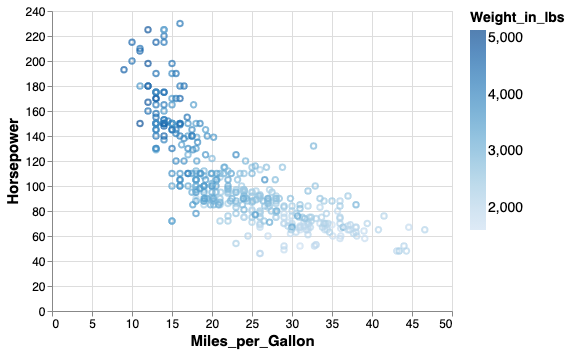

In [6]:
alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower',
    color = 'Weight_in_lbs' # Numerical data (Quantitative) : Colorscale - gradually increasing
)

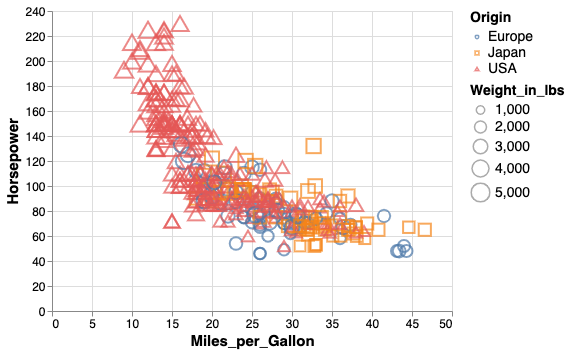

In [10]:
alt.Chart(cars).mark_point().encode(
    x = 'Miles_per_Gallon',
    y = 'Horsepower',
    color = 'Origin', # Categorical data, colorscale - distinct colors
    shape = 'Origin',
    size = 'Weight_in_lbs'
)

##### Basic syntax in ggplot

> Note that ggplot does not including the origin of the plot (x=0, y=0) by default, but Altair does for many cases.

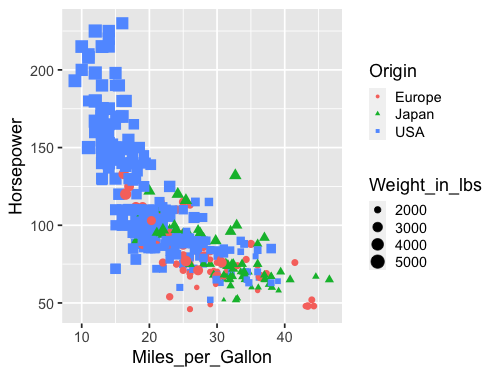

In [14]:
%%R -i cars -w 500 -h 375

ggplot(cars) +
    aes(x = Miles_per_Gallon, y = Horsepower, color = Origin, shape = Origin, size = Weight_in_lbs) +
    geom_point()

#### Transform data directly in ggplot/Altair instead of dplyr/pandas

##### Creating line charts

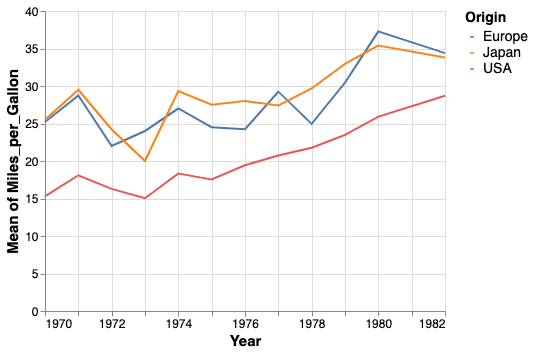

In [17]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)', ## Calculate the mean value for each year in the syntax, just like groupby() operation
    color='Origin'
)

> In ggplot, the default is `stat = 'identity'` (Don't summarise)

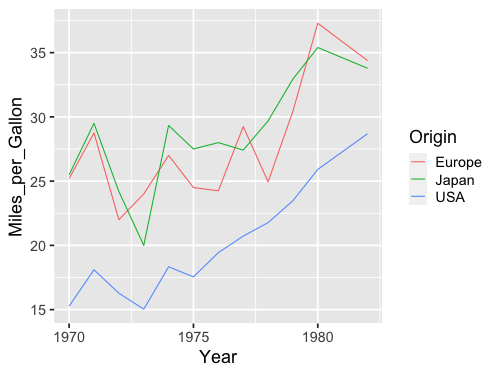

In [23]:
%%R -w 500 -h 375
ggplot(cars) +
    aes(x = Year, y = Miles_per_Gallon, color = Origin) +
    geom_line(stat = 'summary', fun = mean)    # Show a summary of the points instead of all of them. 
    #stat_summary(geom = 'line', fun = mean) does the same thing

#### Combine geometric marks via layering

> Using a set of view composition operators, Altair can take multiple chart definitions and combine them to create more complex views.

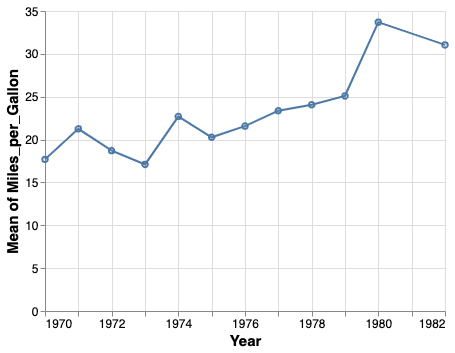

In [25]:
line = alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)')

point = alt.Chart(cars).mark_point().encode(
    x='Year',
    y='mean(Miles_per_Gallon)')

line + point

# Or line + line.mark_point()

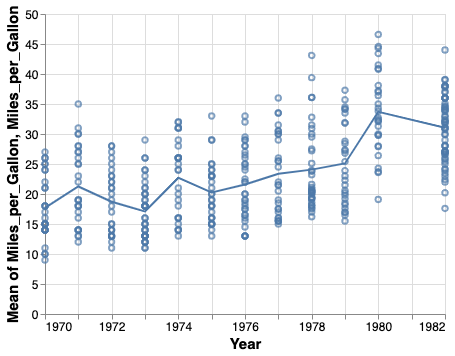

In [28]:
line = alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)')

line + line.mark_point().encode(y= 'Miles_per_Gallon') # add non averaged values

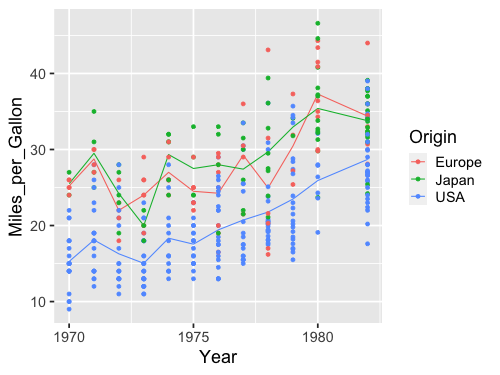

In [32]:
%%R -w 500 -h 375
ggplot(cars) +
    aes(x = Year, y = Miles_per_Gallon, color = Origin) +
    geom_line(stat = 'summary', fun = mean) +
    geom_point() # or geom_point(stat = 'summary', fun = mean) for summarised points

## Lecture 2

### Learning objectives

1. Choose effective visual encodings.
2. Visualize frequencies with bar plots.
3. Facet to explore more variables simultaneously.
4. Customize axes labels and scales.

#### Required Reading
> A scatterplot is a visual representation of data, not way to magically transmit pure understanding. Even well-informed viewers may do worse than we think when connecting the picture to the underlying data

> First, the channel or mapping that we choose needs to be capable of representing the kind of data that we have. Second, given that the data can be comprehensibly represented by the visual element we choose, we will want to know how effective that representation is. Third, the effectiveness of our graphics will depend not just on the channel that we choose, but on the perceptual details of how we implement it. Finally, bear in mind that these different channels or mappings for data are not in themselves kinds of graphs. 

> In a well-constructed chart the axis labels are a necessary guide to the reader, and we should expect readers to pay attention to them. 

> A real strength of ggplot is that it implements a grammar of graphics to organize and make sense of these different elements 

#### Visual Encoding channels

> Most people find it is much easier to compare the length or position of the bars rather than the area of the circles.

> you need to know which visual channels are the easiest for humans to decode

> The biggest issues with using 3D is when it is used unnecessarily (like a 3D bar or pie chart), as the only way to compare position (like a 3D scatter plot), and when they are represented on a 2D medium like a paper where they can't be rotated.

In [34]:
import pandas as pd
url = 'https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv'
gm = pd.read_csv(url)
gm

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
0,Afghanistan,1800,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
1,Afghanistan,1801,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
2,Afghanistan,1802,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
3,Afghanistan,1803,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
4,Afghanistan,1804,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38977,Zimbabwe,2014,15400000,Africa,Sub-Saharan Africa,Low,57.0,1910,3.90,64.3,39.8,0.78,10.9,10.0
38978,Zimbabwe,2015,15800000,Africa,Sub-Saharan Africa,Low,58.3,1890,3.84,59.9,40.8,NaN,11.1,10.2
38979,Zimbabwe,2016,16200000,Africa,Sub-Saharan Africa,Low,59.3,1860,3.76,56.4,41.7,NaN,NaN,NaN
38980,Zimbabwe,2017,16500000,Africa,Sub-Saharan Africa,Low,59.8,1910,3.68,56.8,42.7,NaN,NaN,NaN


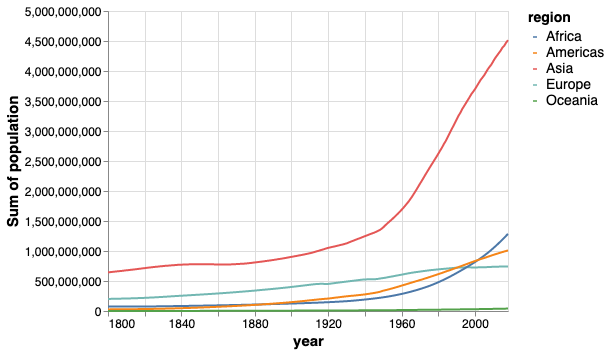

In [36]:
gm['year'] = pd.to_datetime(gm['year'], format='%Y')

alt.Chart(gm).mark_line().encode(
    x='year',
    y='sum(population)',
    color='region')

> The lines make it easy to compare regions against each other, but hard to see overall population since that requires adding them mentally.

> A stacked area chart can clearly show the total population while still giving a good indication of how each region contributes to it.

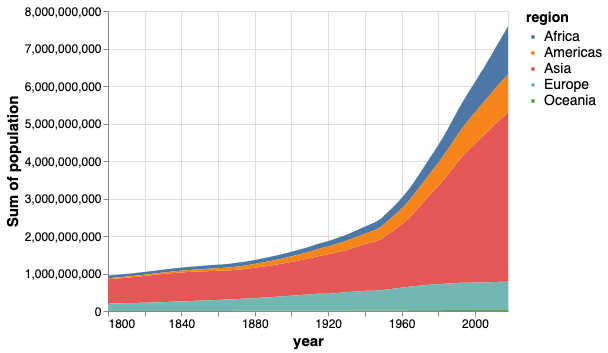

In [38]:
alt.Chart(gm).mark_area().encode(
    x='year',
    y='sum(population)',
    color='region')

In [39]:
%%R
url = 'https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv'
gm = read_csv(url)
glimpse(gm)


── Column specification ────────────────────────────────────────────────────────
cols(
  country = col_character(),
  year = col_double(),
  population = col_double(),
  region = col_character(),
  sub_region = col_character(),
  income_group = col_character(),
  life_expectancy = col_double(),
  income = col_double(),
  children_per_woman = col_double(),
  child_mortality = col_double(),
  pop_density = col_double(),
  co2_per_capita = col_double(),
  years_in_school_men = col_double(),
  years_in_school_women = col_double()
)

Rows: 38,982
Columns: 14
$ country               <chr> "Afghanistan", "Afghanistan", "Afghanistan", "A…
$ year                  <dbl> 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807,…
$ population            <dbl> 3280000, 3280000, 3280000, 3280000, 3280000, 32…
$ region                <chr> "Asia", "Asia", "Asia", "Asia", "Asia", "Asia",…
$ sub_region            <chr> "Southern Asia", "Southern Asia", "Southern Asi…
$ income_group          <chr> "Low", "Low", 

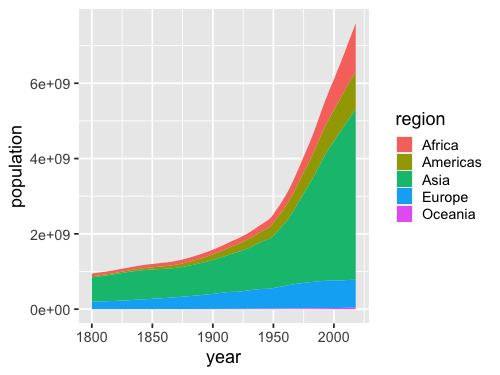

In [43]:
%%R -w 500 -h 375
ggplot(gm) +
    aes(x = year, y = population, fill = region) +
    geom_area(stat = 'summary', fun = sum)

#### Visualize frequencies with bar plots

In [44]:
gm2018 = gm[gm['year'] == '2018']

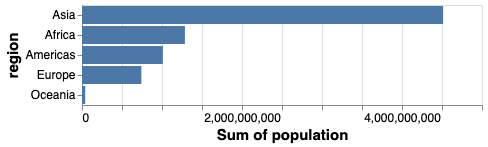

In [51]:
alt.Chart(gm2018).mark_bar().encode(
    y=alt.Y('region', sort='-x'),
    x='sum(population)'
)

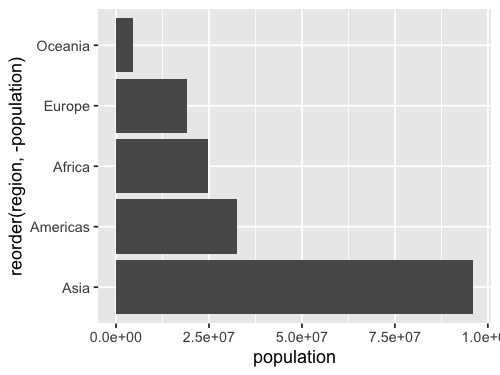

In [66]:
%%R -w 500 -h 375
gm2018 <- gm %>% filter(year == 2018)

ggplot(gm2018) +
    aes(y = reorder(region, -population), x = population) +
    geom_bar(stat = 'summary', fun = mean)

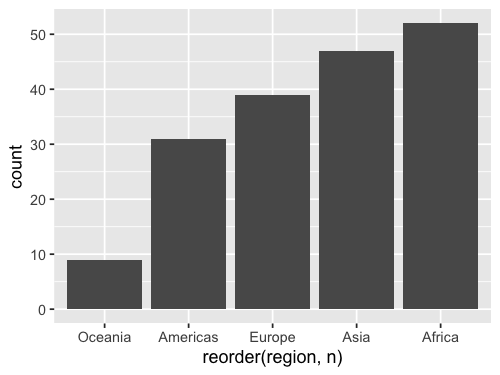

In [68]:
%%R -w 500 -h 375
gm2018 %>%
    add_count(region) %>%   ## If you are using `count`
       ggplot(aes(x = reorder(region, n))) +
        geom_bar()

#### Histogram

- Creating a bar chart for continuous values

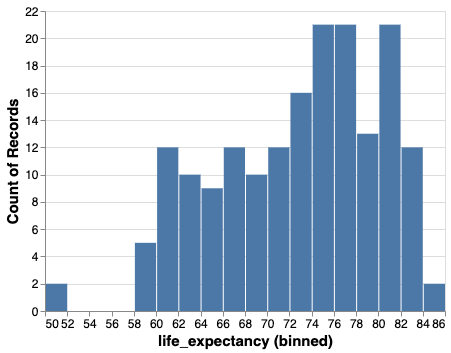

In [71]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy', bin=alt.Bin(maxbins=30)),   # You need to set the bin
    y='count()'
)

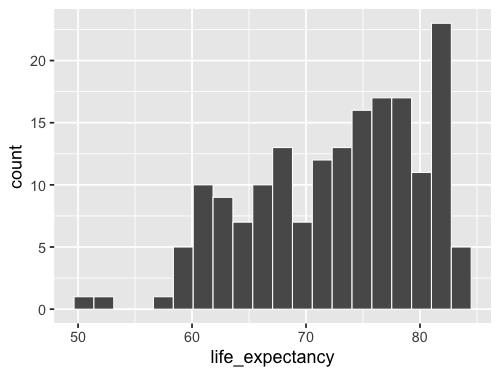

In [79]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy)) +
    geom_histogram(bins=20, color='white')
    #=geom_bar(stat = 'bin')

#### Facet

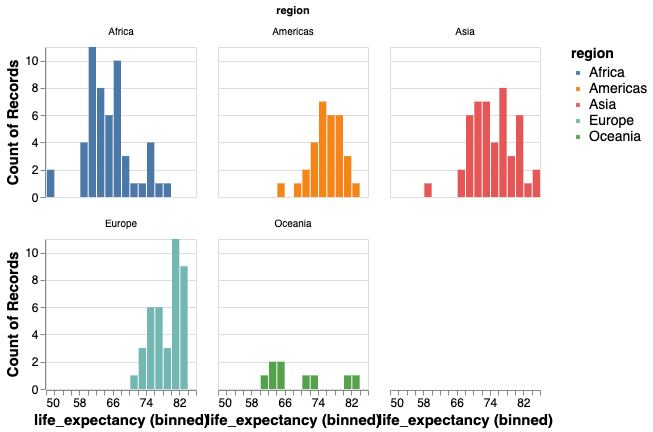

In [89]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='region').properties(width=150, height=150).facet('region', columns=3)

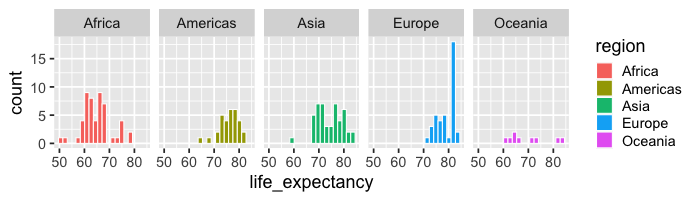

In [97]:
%%R -w 700 -h 200
ggplot(gm2018, aes(x = life_expectancy, fill = region)) +
    geom_histogram(bins = 20, color = 'white') +
    facet_wrap(~region, ncol=5)

#### Customizing axes labels and scales

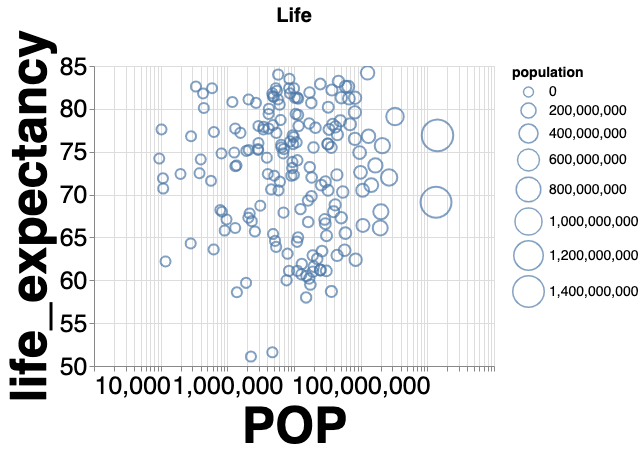

In [99]:
(alt.Chart(gm2018, title='Life').mark_point().encode(               # Change the title of the plot
    alt.X('population', scale=alt.Scale(type='log'), title='POP'),  # Change the x-axis scale to log and the title to 'POP'
    alt.Y('life_expectancy', scale=alt.Scale(zero=False)),          # Change the y-axis scale to not include zero
    alt.Size('population', scale=alt.Scale(range=(100, 1000))),     # Change the range of the size scale to enlarge points
    alt.Tooltip('country'))                                         # Add country on hover
.configure_axis(labelFontSize=25, titleFontSize=50)                 # Change axes title and label font sizes
.configure_title(fontSize=20)                                       # Change plot title font size
.configure_legend(titleFontSize=14)                                 # Change legend font size
.interactive())         

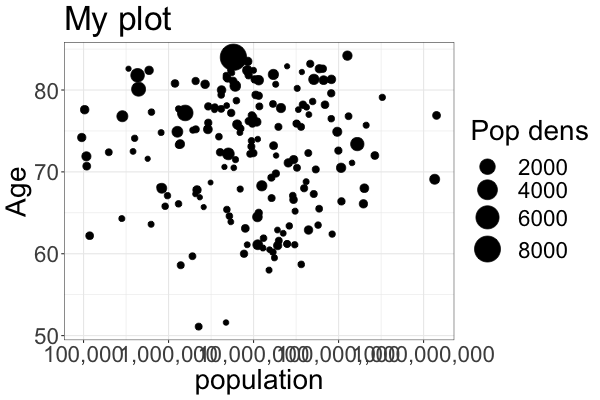

In [100]:
%%R -w 600 -h 400

ggplot(gm2018, aes(x = population, y = life_expectancy, size = pop_density)) +
    geom_point() +
    scale_x_log10(labels = scales::comma) + # Change the x-axis scale to log and supress scientific notation
    scale_size(range = c(2, 12)) +          # Change the range of the size scale to enlarge points
    ylab('Age') +                           # Change the x-axis scale to log and the title to 'POP'
    ggtitle('My plot') +                    # Change the title of the plot
    labs(size = 'Pop dens') +               # Change legend title
    theme_bw() +                            # Change the theme to black and white
    theme(text =  element_text(size = 28))  # Change the text size of all labels

## Lecture 3

### Learning objectives

1. Visualize distributions.
2. Understand how different distribution plots are made and their pros and cons.
3. Select an appropriate distribution plot for the situation.
4. Grasp EDA on a conceptual levels both for numerical and categorical variables.

#### Required reading

#### Visualizing distributions: Histograms and density plots

1. Histograms : Bin width
- Because histograms are generated by binning the data, their exact visual appearance depends on the choice of the **bin width**.
- It is therefore critical to always try different bin widths to verify that the resulting histogram reflects the underlying data accurately. 
- In general, if the bin width is too small, then the histogram becomes **overly peaky and visually busy** and **the main trends in the data may be obscured**. 
- On the other hand, if the bin width is too large, then smaller features in the distribution of the data, such as the dip around age 10, **may disappear**.


2. Density plots : kernel and bandwidth
- visualize the underlying probability distribution of the data by drawing an appropriate continuous curve.
- the most commonly used method for this estimation procedure is called **kernel density estimation**.
    - we draw a continuous curve (the kernel) with a small width (controlled by a parameter called bandwidth) at the location of each data point
    - and then we add up all these curves to obtain the final density estimate.
- too small bandwidth: overly peaky, visually busy, trend obscured
- too large bandwidth: smaller features may disappear
- Gaussian kernel: smooth features and tails
- Rectangular kernel: appearance of steps in the density curve.

> In general, the more data points there are in the data set, the less the choice of the kernel matters. Therefore, **density plots tend to be quite reliable and informative for large data sets** but can be misleading for data sets of only a few points.

- Density plots have a tendency to produce the appearance of data where none exists, in particular in the tails.
  - As a consequence, careless use of density estimates can easily lead to figures that **make nonsensical statements**.
  - For example, if we don’t pay attention, we might generate a visualization of an age distribution that includes negative ages.
- More than one distribution at a time, density estimates have an inherent advantage over histograms.

3. Visualizing multiple distributions at the same time
- Stacked histograms, overlapped density plots may not be ideal for visualizing two distributions.
- Good way:

<img src="https://clauswilke.com/dataviz/visualizing_distributions_I_files/figure-html/titanic-age-fractional-dens-1.png" alt="Drawing" style="width: 500px;"/>

- Other good way: making two separate histograms, rotate them by 90 degrees(age pyramid)

<img src="https://clauswilke.com/dataviz/visualizing_distributions_I_files/figure-html/titanic-age-pyramid-1.png" alt="Drawing" style="width: 500px;"/>

- For multiple distributions, histograms tend to become highly confusing.
- Density plots work well as long as the distributions are somewhat distinct and contiguous.

#### Visualizing many distributions at once

- Whenever we are dealing with many distributions, it is helpful to think in terms of the response variable and one or more grouping variables
- The response variable is the variable whose distributions we want to show.

1. Simple mean(median) plot + error bars

<img src="https://clauswilke.com/dataviz/boxplots_violins_files/figure-html/lincoln-temp-points-errorbars-1.png" alt="Drawing" style="width: 500px;"/>
    
- We are losing a lot of information<br/>
- It is not immediately obvious what the points represents<br>
- It is not obvious what the error bars represent<br>
- Symmetric error bars are misleading if there is nay skew in the data<br>
    
    
2. Box plots

<img src="https://clauswilke.com/dataviz/boxplots_violins_files/figure-html/lincoln-temp-boxplots-1.png" alt="Drawing" style="width: 500px;"/>
    
- We can see that temperature is highly skewed in December, not in July.

3. Violin plot
- Violins can be used whenever one would otherwise use a boxplot, and they provide a much more nuanced picture of the data.
- In particular, violin plots will accurately represent **bimodal data** whereas a boxplot will not.

<img src="https://clauswilke.com/dataviz/boxplots_violins_files/figure-html/lincoln-temp-violins-1.png" alt="Drawing" style="width: 500px;"/>
    
- they can generate the appearance that there is data where none exists<br>
- or that the data set is very dense when actually it is quite sparse.
    
4. Jitter plot (strip chart + jittering)
- Simple solution to overplotting is to spread out the points somewhat along the x axis, by adding some random noise in the x dimension.

<img src="https://clauswilke.com/dataviz/boxplots_violins_files/figure-html/lincoln-temp-jittered-1.png" alt="Drawing" style="width: 500px;"/>
    
5. Sina plot
- A hybrid between a violin plot and jittered points

<img src="https://clauswilke.com/dataviz/boxplots_violins_files/figure-html/lincoln-temp-sina-1.png" alt="Drawing" style="width: 500px;"/>

6. Ridgeline plot

    <img src="https://clauswilke.com/dataviz/boxplots_violins_files/figure-html/temp-ridgeline-1.png" alt="Drawing" style="width: 500px;"/>
- Works well if want to show trends in distribution over time
- There is no separate axis for the density estimates in a ridgeline plot
- easy comparison of density shapes and relative heights across groups
- Also works well if we want to compare two trends over time.

    <img src="https://clauswilke.com/dataviz/boxplots_violins_files/figure-html/dw-nominate-ridgeline-1.png" alt="Drawing" style="width: 500px;"/>


## Lecture 4 

### Learning objectives

1. Create density plots to compare a few distributions.
2. Create boxplots and violin plot to compare many distributions.
3. Use repeated plot grids to investigate multiple data frame columns in the same plot.
4. Visualize correlations and counts of categorical variables.

#### Required reading

1. Bar plots
- Labels identifying each bar take up a lot of horizontal space
- The better solution for long labels is usually to swap the x and the y axis, so that the bars run horizontally.
    - Make sure the bars are arranged
    - If the original data have natural ordering, then keep it.
    
<img src="https://clauswilke.com/dataviz/visualizing_amounts_files/figure-html/boxoffice-horizontal-1.png" alt="Drawing" style="width: 500px;"/>

2. Grouped and stacked bars
- Drawing groups of bars side-by-side is sometimes better than having a grouped bar chart 

<img src="https://clauswilke.com/dataviz/visualizing_amounts_files/figure-html/income-by-age-race-faceted-1.png" alt="Drawing" style="width: 500px;"/>

- Stacked bars are useful when the sum of the amounts represented by the individual stacked bars is in itself a meaningful amount.


3. Dot plots
- Make sure they are arranged!


4. Heatmaps
- it does an excellent job of highlighting broader trends

<img src="https://clauswilke.com/dataviz/visualizing_amounts_files/figure-html/internet-over-time-1.png" alt="Drawing" style="width: 500px;"/>

In [102]:
movies = pd.read_json('data/lec2-movies.json')
movies

,id,title,runtime,budget,revenue,genres,countries,vote_average,vote_loved_it,vote_count,vote_std
0,12,Finding Nemo,100,94000000,940335536,[Animation],[United States of America],3.86,0.322,33887,0.87
1,22,Pirates of the Caribbean: The Curse of the Bla...,143,140000000,655011224,[Fantasy],[United States of America],3.81,0.320,36337,0.91
2,35,The Simpsons Movie,87,75000000,527068851,[Animation],[United States of America],3.44,0.155,8621,0.92
3,58,Pirates of the Caribbean: Dead Man's Chest,151,200000000,1065659812,[Fantasy],[United States of America],3.47,0.198,15079,0.98
4,75,Mars Attacks!,106,70000000,101371017,[Fantasy],[United States of America],2.96,0.086,19515,1.10
...,...,...,...,...,...,...,...,...,...,...,...
675,374720,Dunkirk,107,100000000,519876949,[History],"[United Kingdom, United States of America]",4.11,0.465,282,0.78
676,378236,The Emoji Movie,86,50000000,66913939,[Animation],[United States of America],0.63,0.000,19,0.23
677,381289,A Dog's Purpose,100,22000000,194647323,[Fantasy],[United States of America],3.61,0.284,109,1.17
678,382322,Batman: The Killing Joke,72,3500000,3775000,[Animation],[United States of America],2.94,0.057,209,1.02


#### Create density plots to compare a few distributions.

- Before facetting the histogram by country, we need to explode the column

In [106]:
boom_countries = movies.explode('countries')

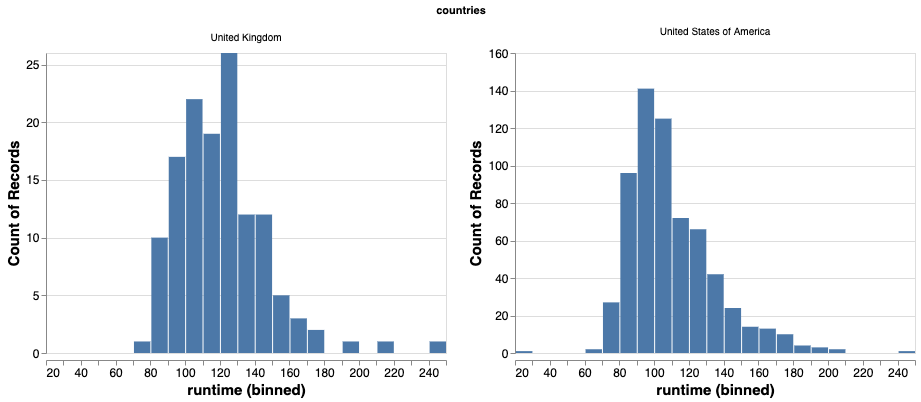

In [112]:
alt.Chart(boom_countries).mark_bar().encode(
    alt.X('runtime', bin=alt.Bin(maxbins=30)),
    y='count()'
).facet('countries'
       ).resolve_scale(y='independent') # Make the y scale independent

In [113]:
boom_both = boom_countries.explode('genres')

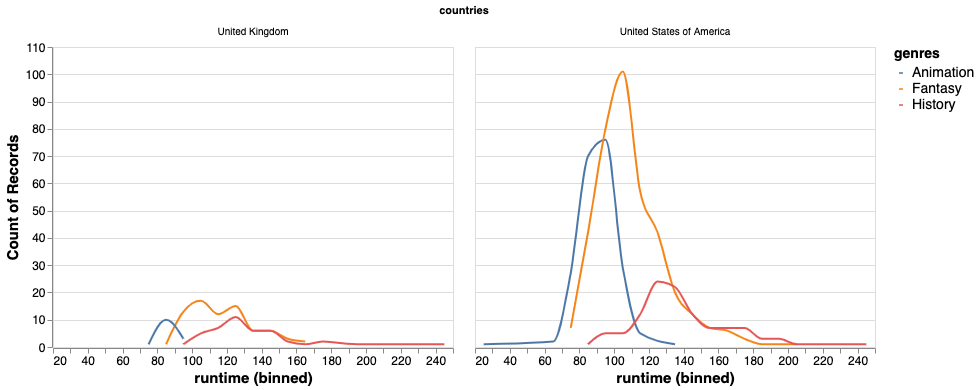

In [119]:
alt.Chart(boom_both).mark_line(interpolate='monotone').encode(   ## interpolate='monotone' makes the graph smoother
    alt.X('runtime', bin=alt.Bin(maxbins=30)),
    alt.Y('count()'),
    color='genres'
).facet('countries')

##### KDE 

1. Calculate the KDE
2. Plot a line or area mark for the newly calculated KDE values

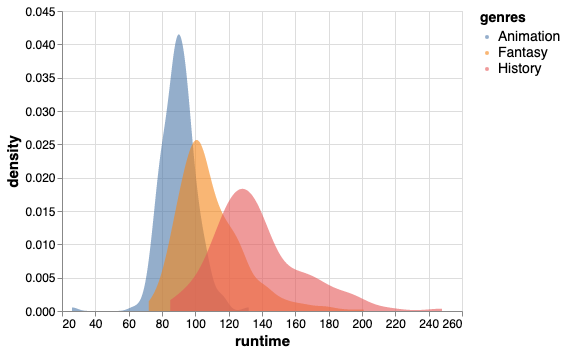

In [125]:
boom_genres = movies.explode('genres')
(alt.Chart(boom_genres)
 .transform_density(               ## calculate the KDE
     'runtime',
     groupby=['genres'],
     as_=['runtime', 'density'],
     steps=200)                    ## make the curves smoother
 .mark_area(opacity = 0.6).encode(
     x='runtime',
     y='density:Q',
     color='genres'))

- the important thing here is the shape to see how the values are distributed
- and possibly the size if you scale them, but just as a relative indicator versus other densities
- rather than relying too much on the exact values on the y-axis.

In [126]:
%%R
library(rjson)
library(tidyverse)
movies <- fromJSON(file = 'data/lec2-movies.json') %>%
    as_tibble() %>%
    unnest(-c(countries, genres))
    
head(movies)

# A tibble: 6 x 11
     id title runtime budget revenue genres countries vote_average vote_loved_it
  <dbl> <chr>   <dbl>  <dbl>   <dbl> <name> <named l>        <dbl>         <dbl>
1    12 Find…     100 9.40e7  9.40e8 <chr … <chr [1]>         3.86         0.322
2    22 Pira…     143 1.40e8  6.55e8 <chr … <chr [1]>         3.81         0.32 
3    35 The …      87 7.50e7  5.27e8 <chr … <chr [1]>         3.44         0.155
4    58 Pira…     151 2.00e8  1.07e9 <chr … <chr [1]>         3.47         0.198
5    75 Mars…     106 7.00e7  1.01e8 <chr … <chr [1]>         2.96         0.086
6   117 The …     119 2.50e7  7.63e7 <chr … <chr [1]>         3.88         0.268
# … with 2 more variables: vote_count <dbl>, vote_std <dbl>


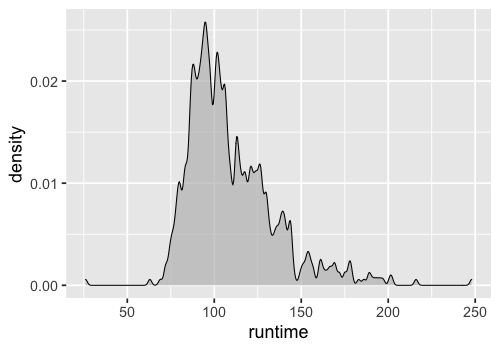

In [128]:
%%R -w 500 -h 350
ggplot(movies) +
    aes(x = runtime) +
    geom_density(bw=1, fill = 'grey', alpha = 0.7)    # control bandwidth

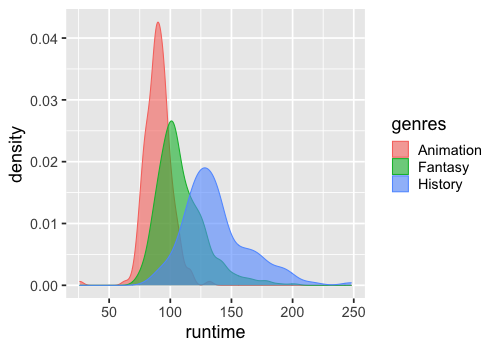

In [134]:
%%R -w 500 -h 350
free_genres <- movies %>% unnest(genres)   ## This is like the .explode in pandas
ggplot(free_genres) +
    aes(x = runtime,
        fill = genres,
        color = genres) +
    geom_density(alpha = 0.6)

We need to unpack both `genres` and `countries` if we want to use aesthetic mappings for both these columns.

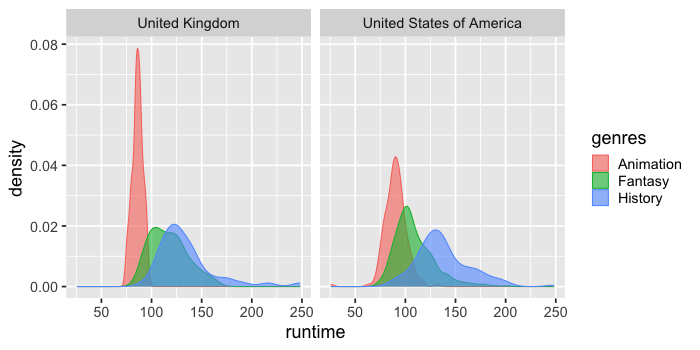

In [140]:
%%R -w 700 -h 350
free_both <- free_genres %>%
    unnest(countries)
    
ggplot(free_both) +
    aes(x = runtime,
        fill = genres,
        color = genres) +
    geom_density(alpha = 0.6) +
    facet_wrap(~countries)
#     facet_grid(genres ~ countries)

#### Boxplots and violin plot for many distributions

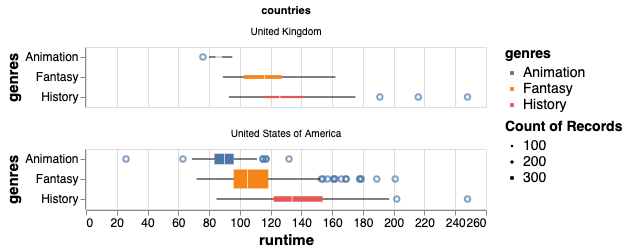

In [151]:
alt.Chart(boom_both).mark_boxplot().encode(
    alt.X('runtime'),
    alt.Y('genres'),
    alt.Color('genres'),
    size='count()'
).facet('countries', columns=1)

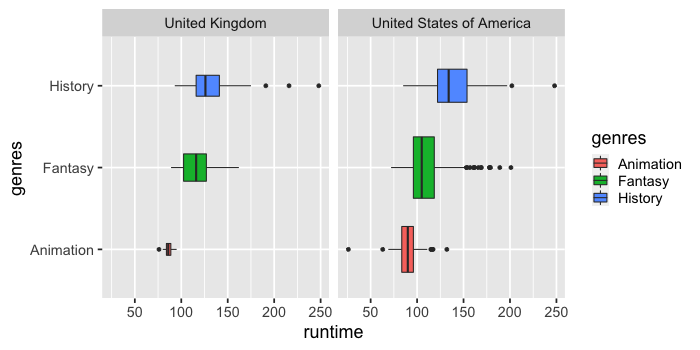

In [149]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = genres) +
    geom_boxplot(varwidth = TRUE) +   ## scale boxplots by the count of observations
    facet_wrap(~countries)

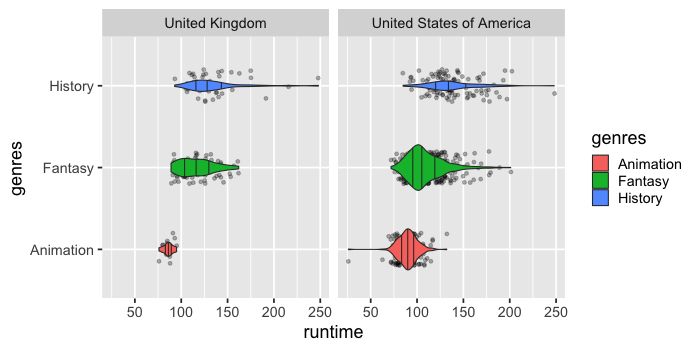

In [161]:
%%R -w 700 -h 350
ggplot(free_both) +
    aes(x = runtime,
        y = genres,
        fill = genres) +
    geom_jitter(height = 0.2, alpha = 0.3) +
    geom_violin(scale = 'count', draw_quantiles = c(0.25, 0.5, 0.75)) +
    facet_wrap(~countries)

#### Repeating plots

`.repeat` method

- we can create subplots that each display all the data points, but is repeated for different columns in the data.

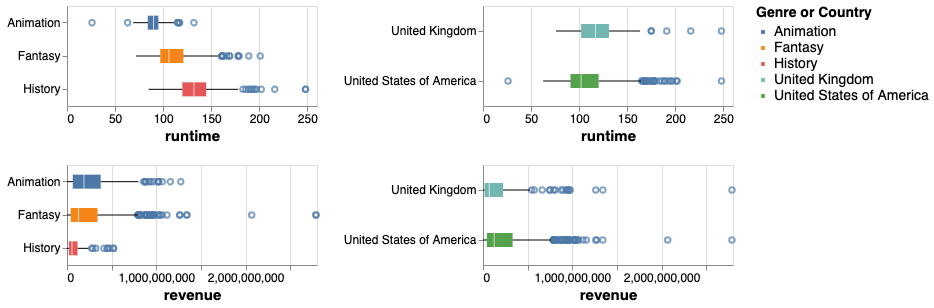

In [162]:
(alt.Chart(boom_both)
 .mark_boxplot().encode(
     alt.X(alt.repeat('row'), type='quantitative'),
     alt.Y(alt.repeat('column'), type='nominal', title=''),
     alt.Color(alt.repeat('column'), type='nominal', title='Genre or Country'))
 .properties(height=100, width=250)
 .repeat(column=['genres', 'countries'], row=['runtime', 'revenue']))

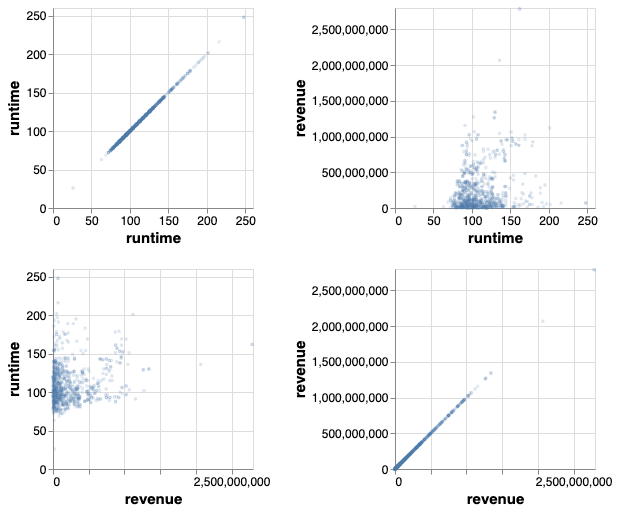

In [164]:
(alt.Chart(boom_both)
 .mark_point(size=2, opacity=0.2).encode(
     alt.X(alt.repeat('row'), type='quantitative'),
     alt.Y(alt.repeat('column'), type='quantitative'))
 .properties(width=200, height=200)
 .repeat(column=['runtime', 'revenue'], row=['runtime', 'revenue']))

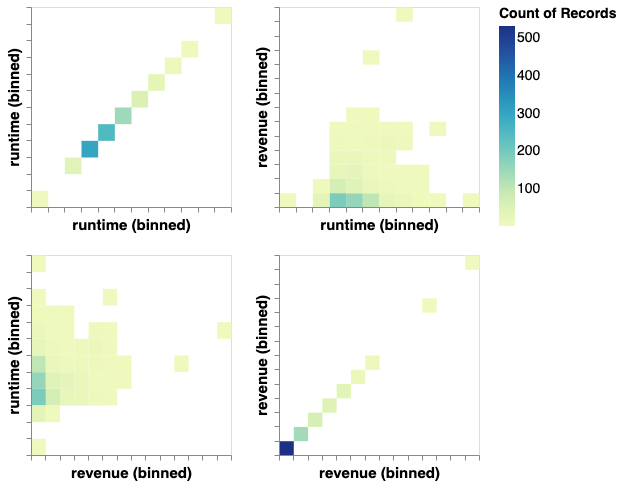

In [165]:
(alt.Chart(boom_both)
 .mark_rect().encode(
     alt.X(alt.repeat('row'), type='quantitative', bin=alt.Bin(maxbins=20)),
     alt.Y(alt.repeat('column'), type='quantitative', bin=alt.Bin(maxbins=20)),
     alt.Color('count()'))
 .properties(width=200, height=200)
 .repeat(column=['runtime', 'revenue'], row=['runtime', 'revenue'])
 .configure_axis(labels=False))

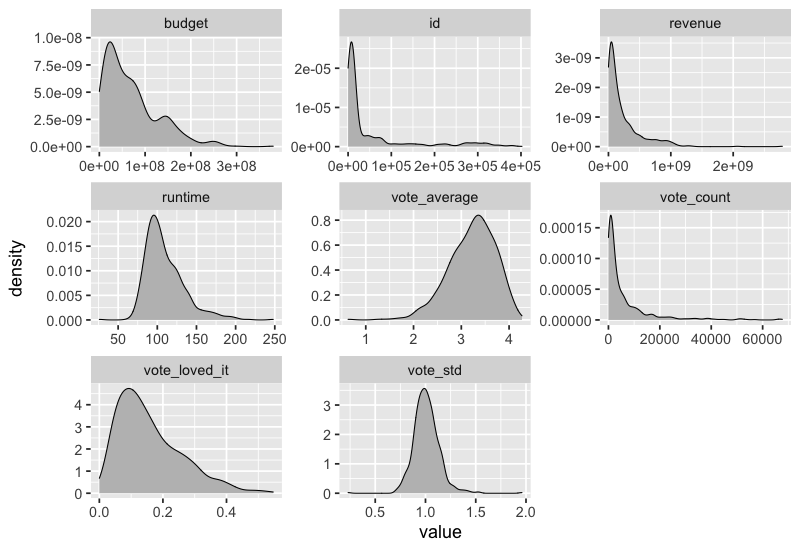

In [166]:
%%R -w 800 -h 550
movies %>%
    select_if(is.numeric) %>%
    pivot_longer(everything()) %>%     ## pivot all data frame variables into the same column -> repeat with facet_wrap
    ggplot(aes(x = value)) + 
        geom_density(fill = 'grey') + 
        facet_wrap(~name, scales = 'free')

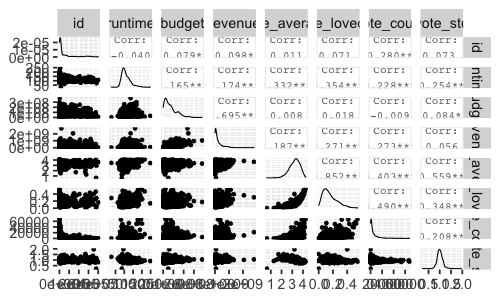

In [169]:
%%R -w 500 -h 300
GGally::ggpairs(movies %>% select_if(is.numeric), progress = FALSE)

#### Visualize correlations and counts of categorical variables

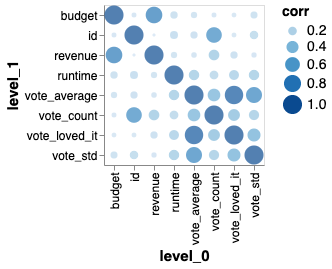

In [171]:
corr_df = (
    movies
    .select_dtypes('number')
    .corr('spearman')           # Makes us detect non linear relationships better
    .abs()                      # Use abs for negative correlation to stand out
    .stack()                    # Get df into long format for altair
    .reset_index(name='corr'))  # Name the index that is reset to avoid name collision

alt.Chart(corr_df).mark_circle().encode(
    x='level_0',
    y='level_1',
    size='corr',
    color='corr')

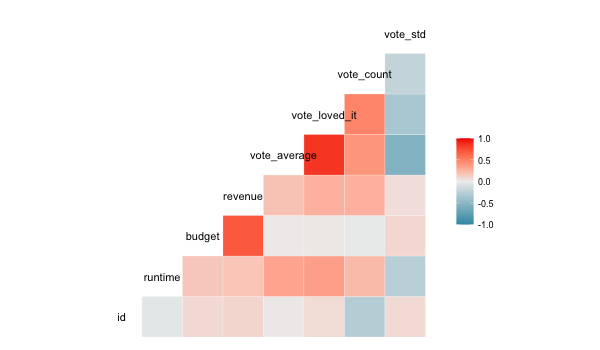

In [172]:
%%R -w 600 -h 350
GGally::ggcorr(movies)

#### Counting combinations of categorical groups

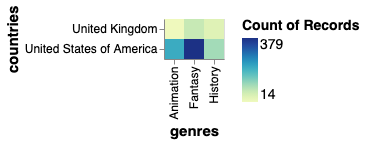

In [174]:
alt.Chart(boom_both).mark_rect().encode(
    x='genres',
    y='countries',
    color='count()')

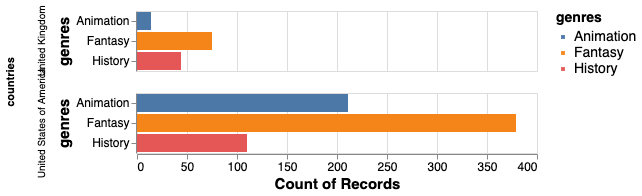

In [175]:
alt.Chart(boom_both).mark_bar().encode(
    x='count()',
    y='genres',
    color='genres').facet(row='countries')

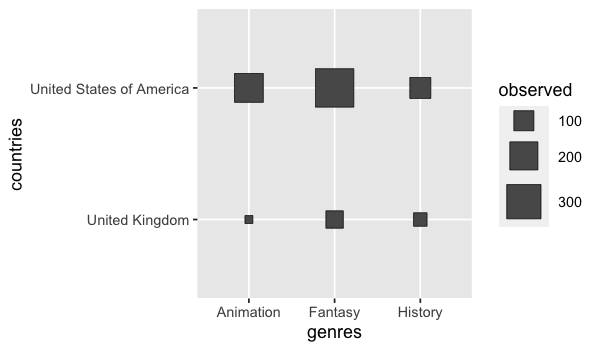

In [176]:
%%R -w 600 -h 350
GGally::ggally_cross(free_both, aes(x = genres, y = countries))

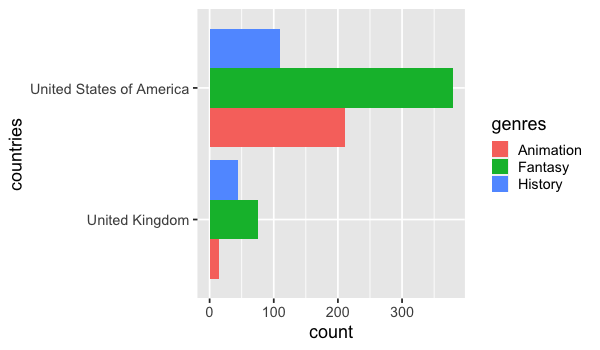

In [181]:
%%R -w 600 -h 350
ggplot(free_both) +
    aes(y = countries,
        fill = genres) +
    geom_bar(stat = 'count', position = 'dodge') ## position = 'dodge' makes stacked bar plots separated